AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [13]:
import pandas as pd
titanic_df = pd.read_csv('titanic.csv')

print("First 10 rows:")
print(titanic_df.head(10).to_string())

print("\nLast 20 rows:")
print(titanic_df.tail(20).to_string())

print("\nDataset Information:")
print(titanic_df.info())

print("\nDataset Description:")
print(titanic_df.describe().to_string())

First 10 rows:
   PassengerId Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1        0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171     7.25   NaN        S
1            2        1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3        1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282    7.925   NaN        S
3            4        1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803     53.1  C123        S
4            5        0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450     8.05   NaN        S
5            6        0       3                        

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


The missing values :
<bound method DataFrame.to_string of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  F

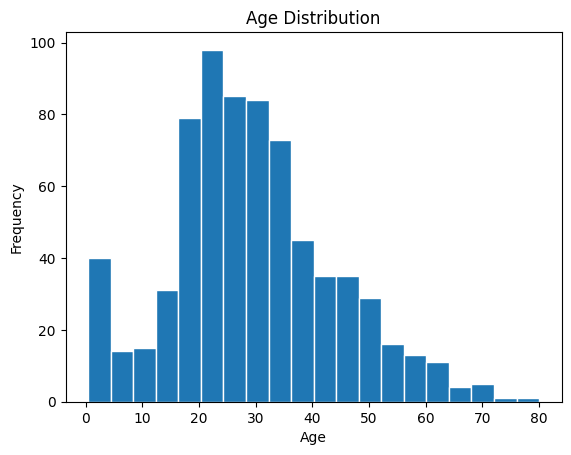

Mean Age: 29.69911764705882, Median Age: 28.0
Updated missing values count:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('titanic.csv')
print("The missing values :")
print(titanic_df.isna().to_string)

plt.hist(titanic_df['Age'], edgecolor ='white',bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


mean_age = titanic_df['Age'].mean()
median_age = titanic_df['Age'].median()
print(f"Mean Age: {mean_age}, Median Age: {median_age}")
titanic_df['Age'] = titanic_df['Age'].fillna(median_age)

titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')


mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(mode_embarked)

titanic_df['Survived'] = titanic_df['Survived'].apply(lambda x: 1 if x in [0, 1] else 0)

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())


print("Updated missing values count:")
print(titanic_df.isna().sum())




AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Average Fare by Pclass:
Pclass
1    83.687751
2    20.528782
3    13.690291
Name: Fare, dtype: float64


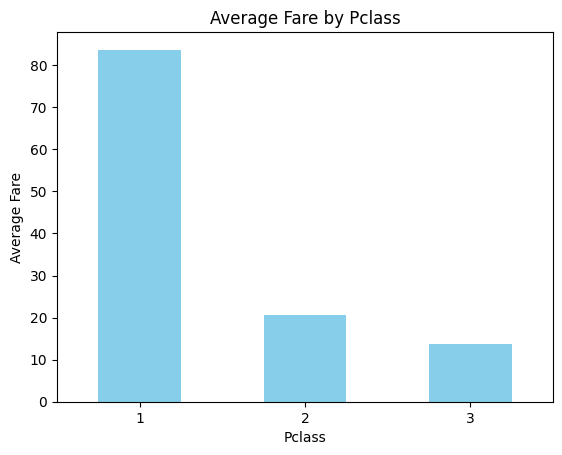

Average Fare by Sex:
Sex
female    44.265872
male      25.435527
Name: Fare, dtype: float64


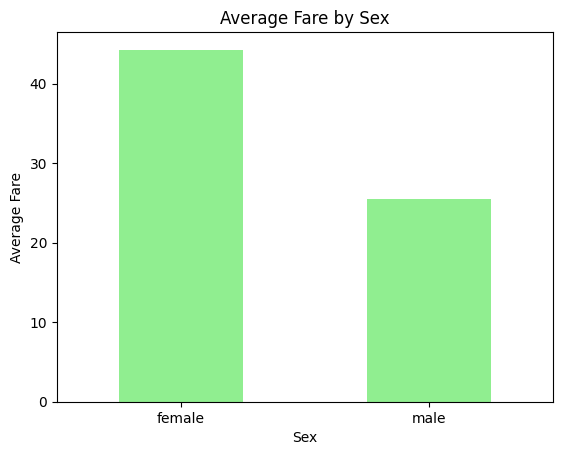

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('titanic.csv')

titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())

avg_fare_pclass = titanic_df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Pclass:")
print(avg_fare_pclass)

avg_fare_pclass.plot(kind='bar', color='skyblue')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


avg_fare_sex = titanic_df.groupby('Sex')['Fare'].mean()
print("Average Fare by Sex:")
print(avg_fare_sex)

avg_fare_sex.plot(kind='bar', color='lightgreen')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

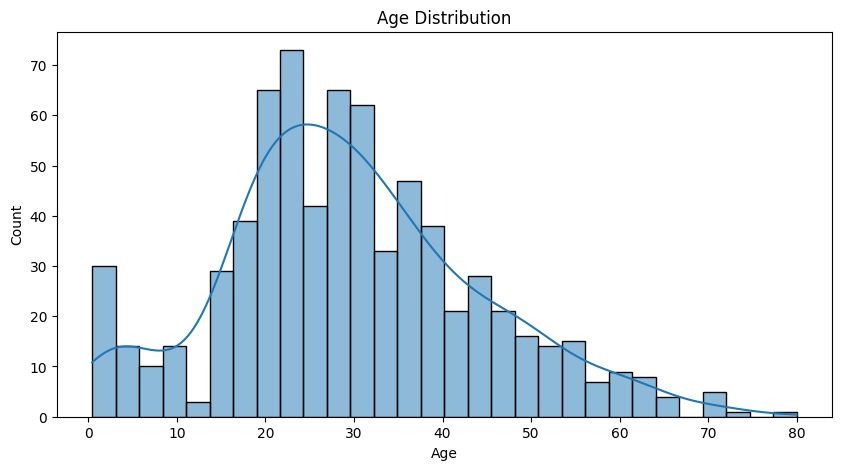

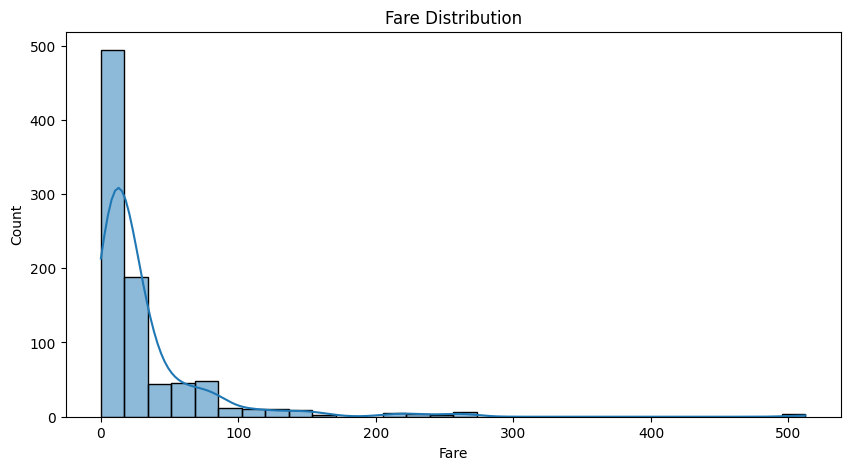

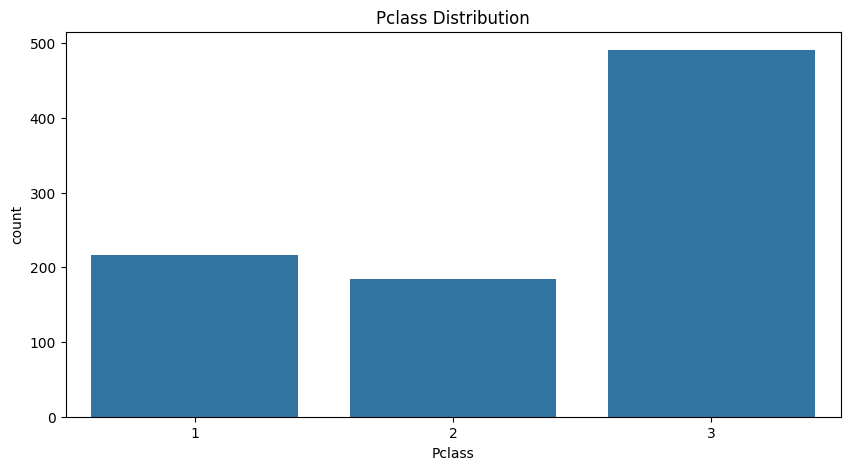

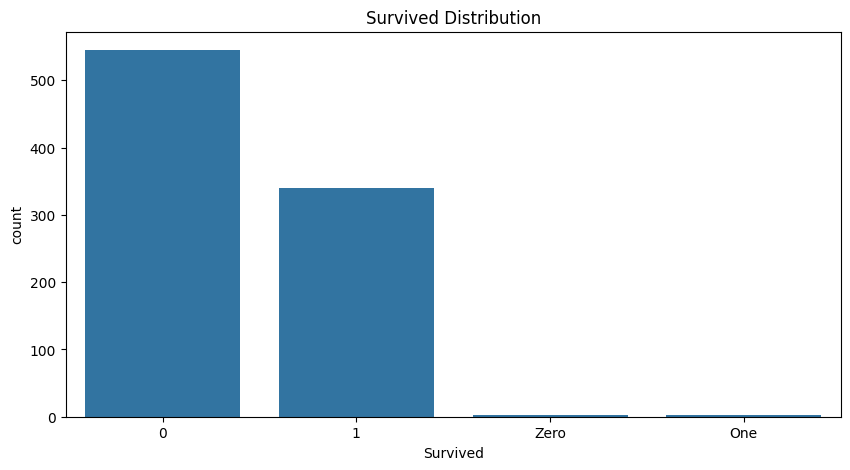

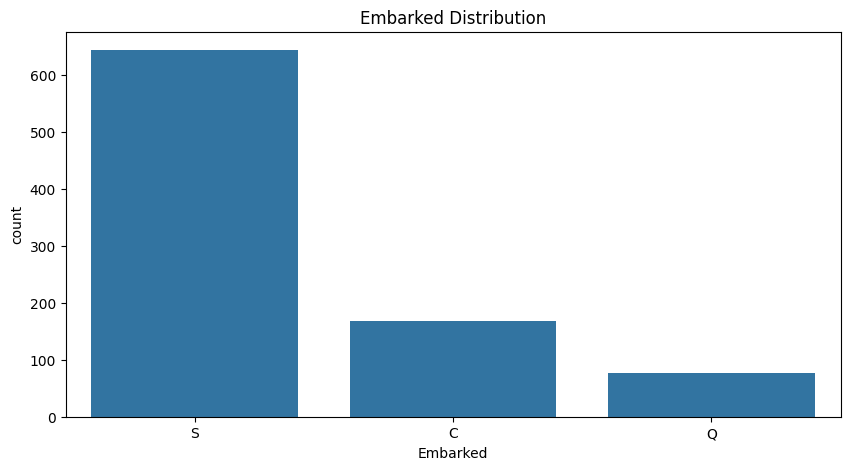

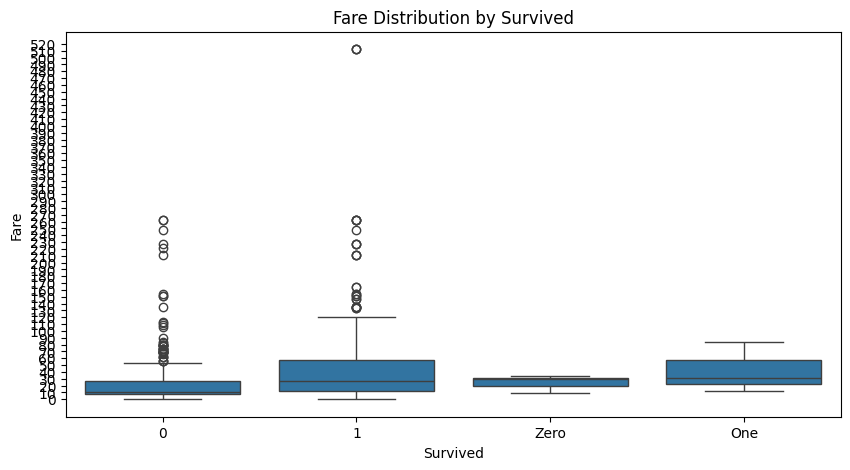

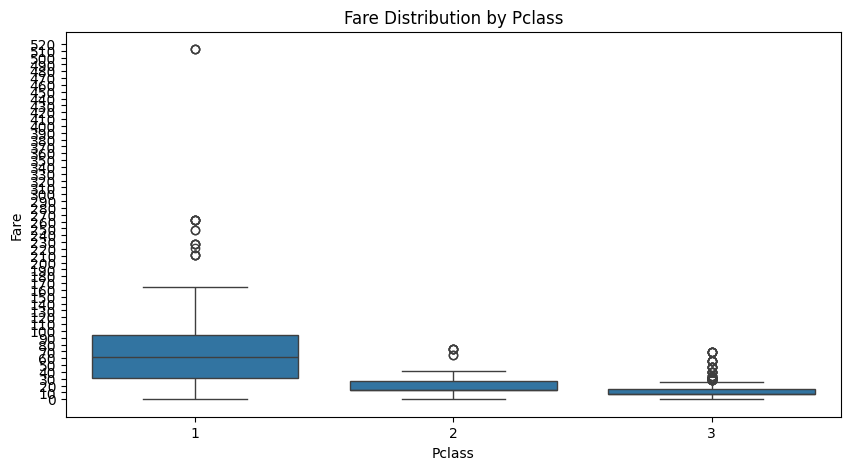

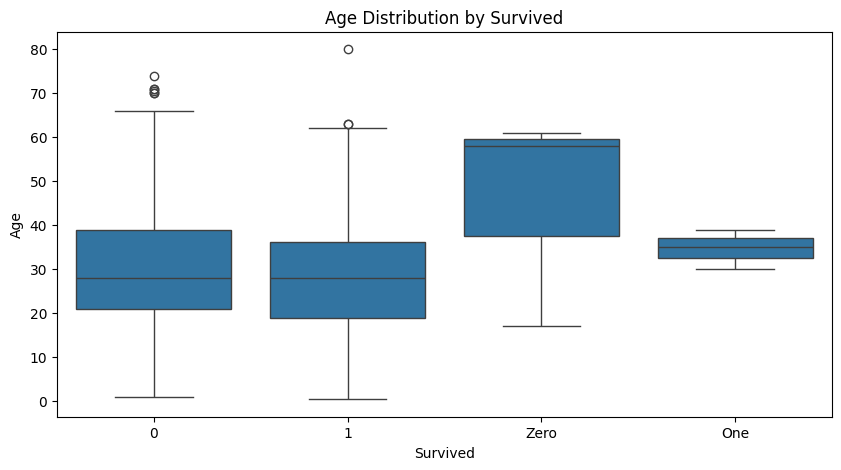

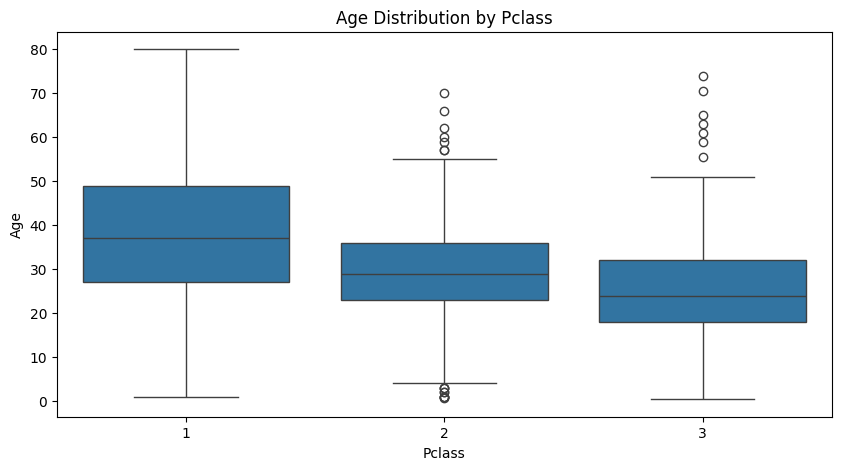

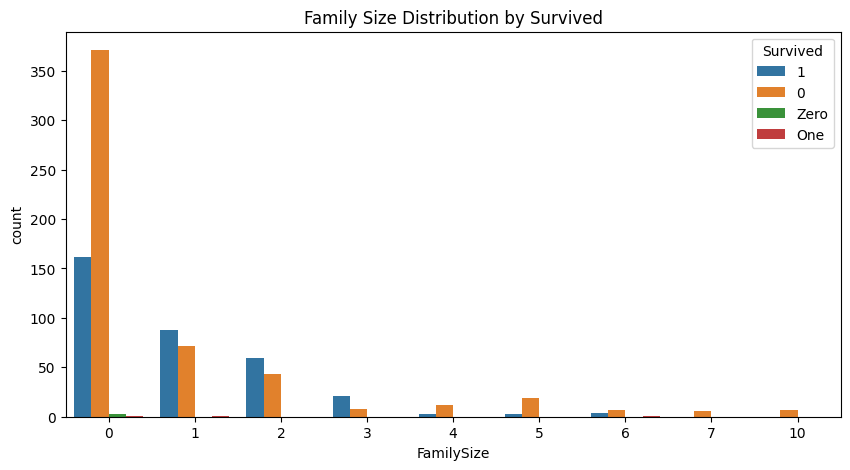

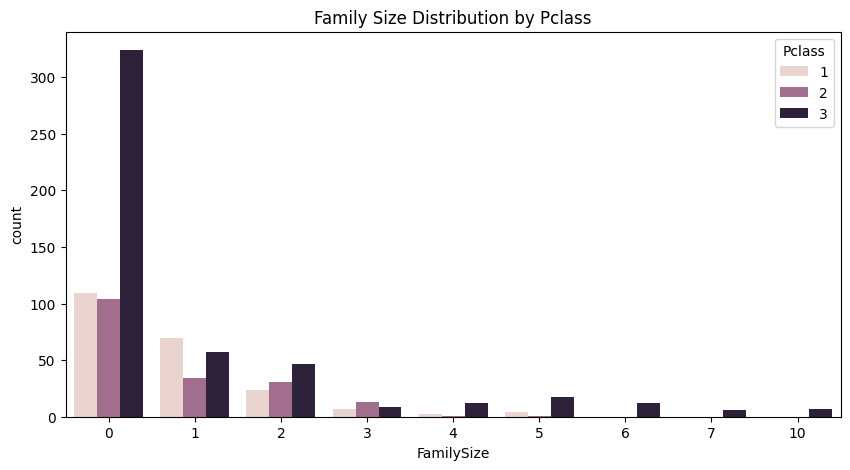

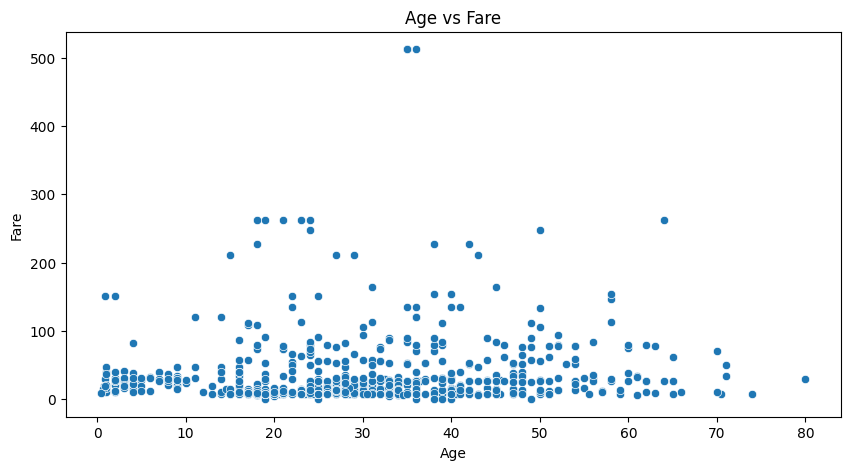

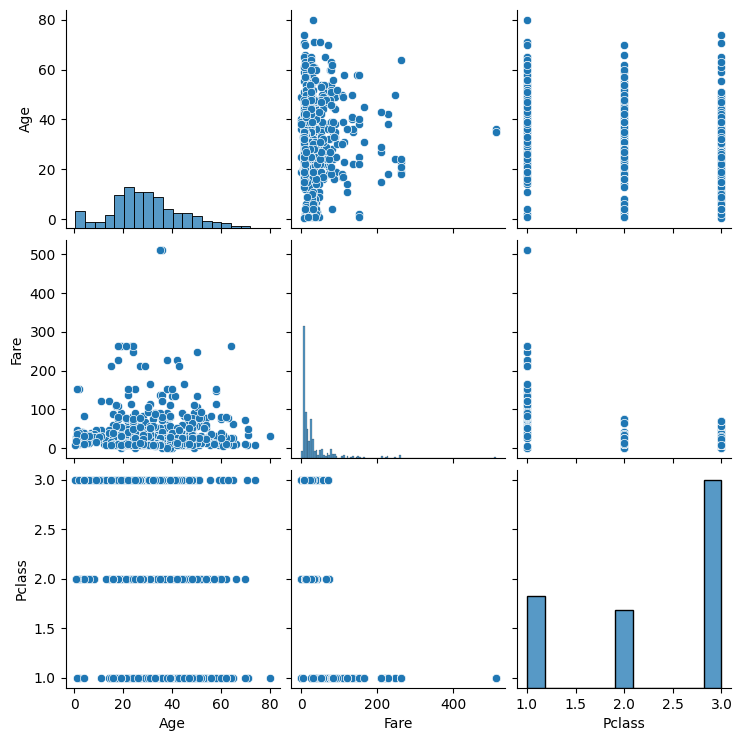

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('titanic.csv')
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')


plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(titanic_df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Pclass Distribution')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survived Distribution')
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('Embarked Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Survived')
plt.yticks(ticks=range(0, int(titanic_df['Fare'].max()) + 10, 10), fontsize=10)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Pclass')
plt.yticks(ticks=range(0, int(titanic_df['Fare'].max()) + 10, 10), fontsize=10)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age Distribution by Survived')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Pclass')
plt.show()

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)
plt.title('Family Size Distribution by Survived')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='FamilySize', hue='Pclass', data=titanic_df)
plt.title('Family Size Distribution by Pclass')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('Age vs Fare')
plt.yticks(fontsize=10)
plt.show()

sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object


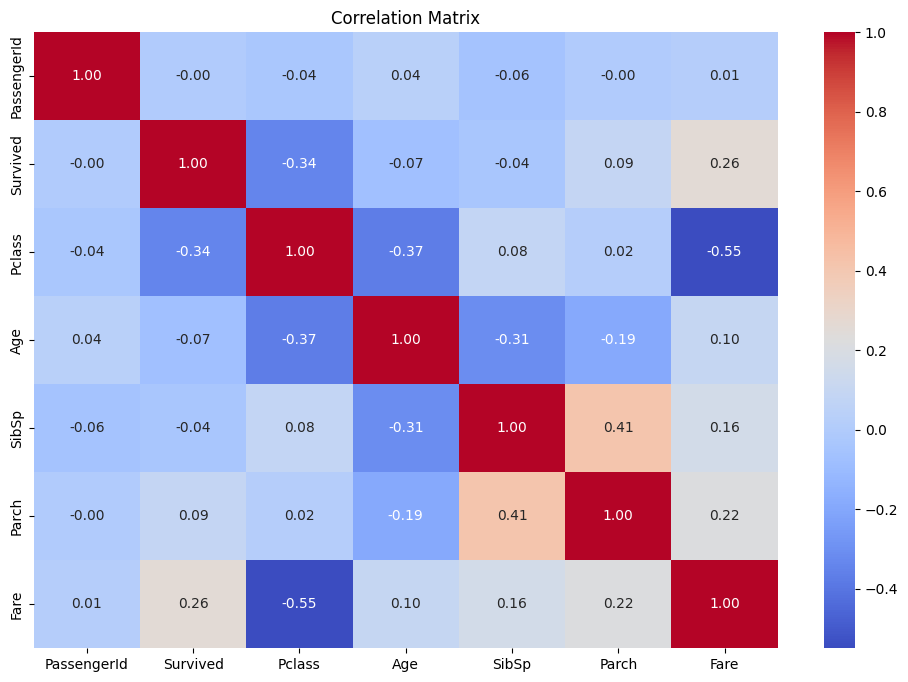

Correlation between Age and Fare: 0.10
PassengerId   -0.002010
Survived       1.000000
Pclass        -0.339821
Age           -0.074185
SibSp         -0.036284
Parch          0.088788
Fare           0.255432
Name: Survived, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


titanic_df = pd.read_csv('titanic.csv')
print(titanic_df.dtypes)

titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')
titanic_df['SibSp'] = pd.to_numeric(titanic_df['SibSp'], errors='coerce')
titanic_df['Parch'] = pd.to_numeric(titanic_df['Parch'], errors='coerce')

titanic_df['Pclass'] = pd.to_numeric(titanic_df['Pclass'], errors='coerce')
titanic_df['Survived'] = pd.to_numeric(titanic_df['Survived'], errors='coerce')

numeric_df = titanic_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

age_fare_corr = titanic_df['Age'].corr(titanic_df['Fare'])
print(f"Correlation between Age and Fare: {age_fare_corr:.2f}")

survived_corr = numeric_df.corr()['Survived']
print(survived_corr)

